<a href="https://colab.research.google.com/github/lathamithu/Techvolt-Intern/blob/master/Final_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Necessary libraries imported

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures


Analyzing the train dataset

In [ ]:
train = pd.read_csv("train_NIR5Yl1.csv")

In [ ]:
train.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

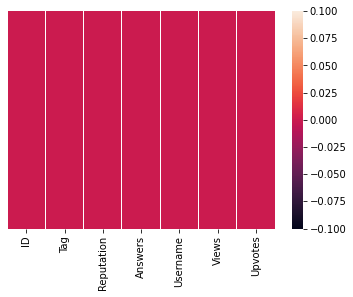

In [ ]:
sns.heatmap(train.isnull(), yticklabels = False)

In [ ]:
train = train.dropna()
train.reset_index(drop=True)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0


In [ ]:
train.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

Pair Plot

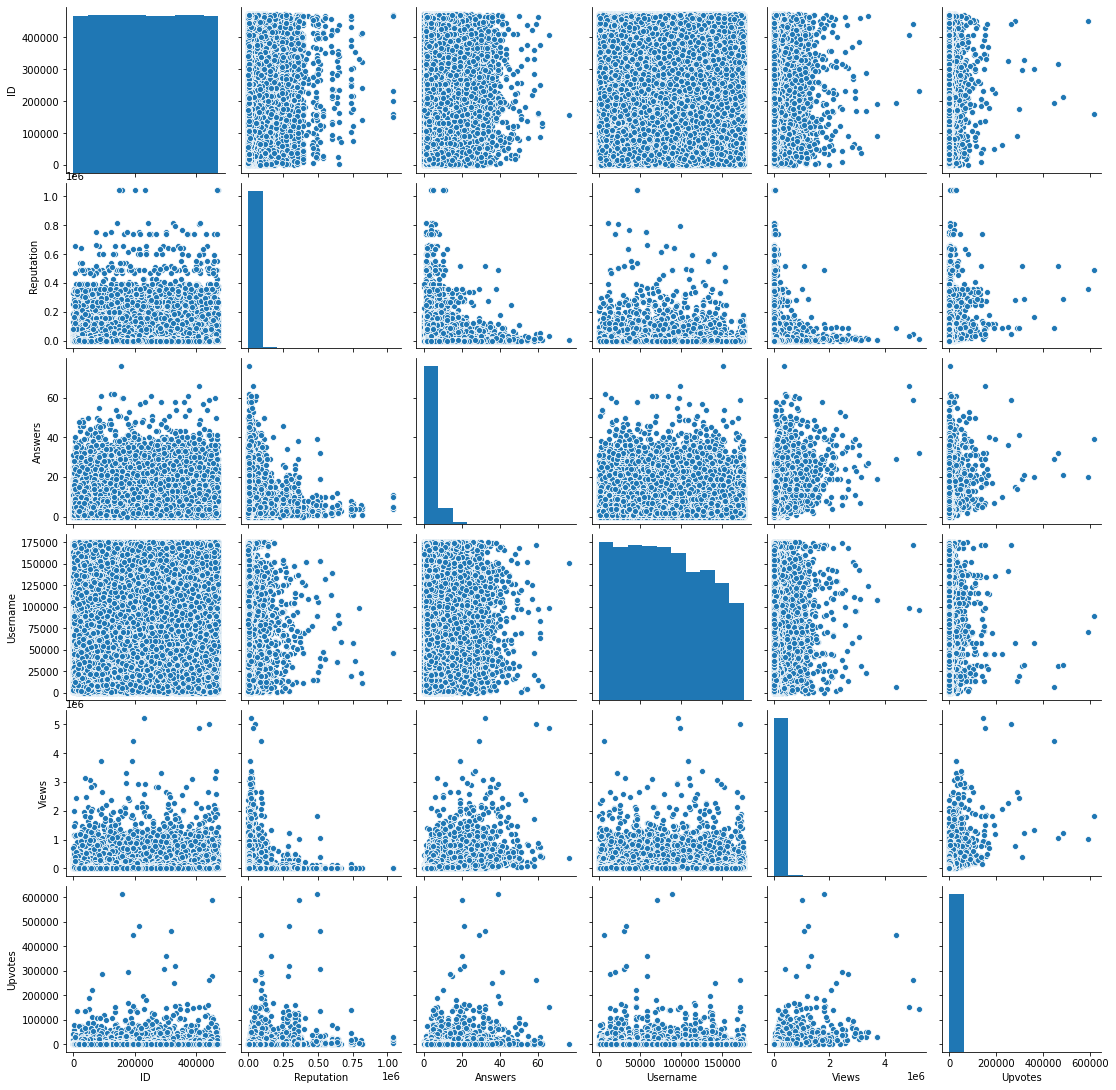

In [ ]:
sns.pairplot(train)

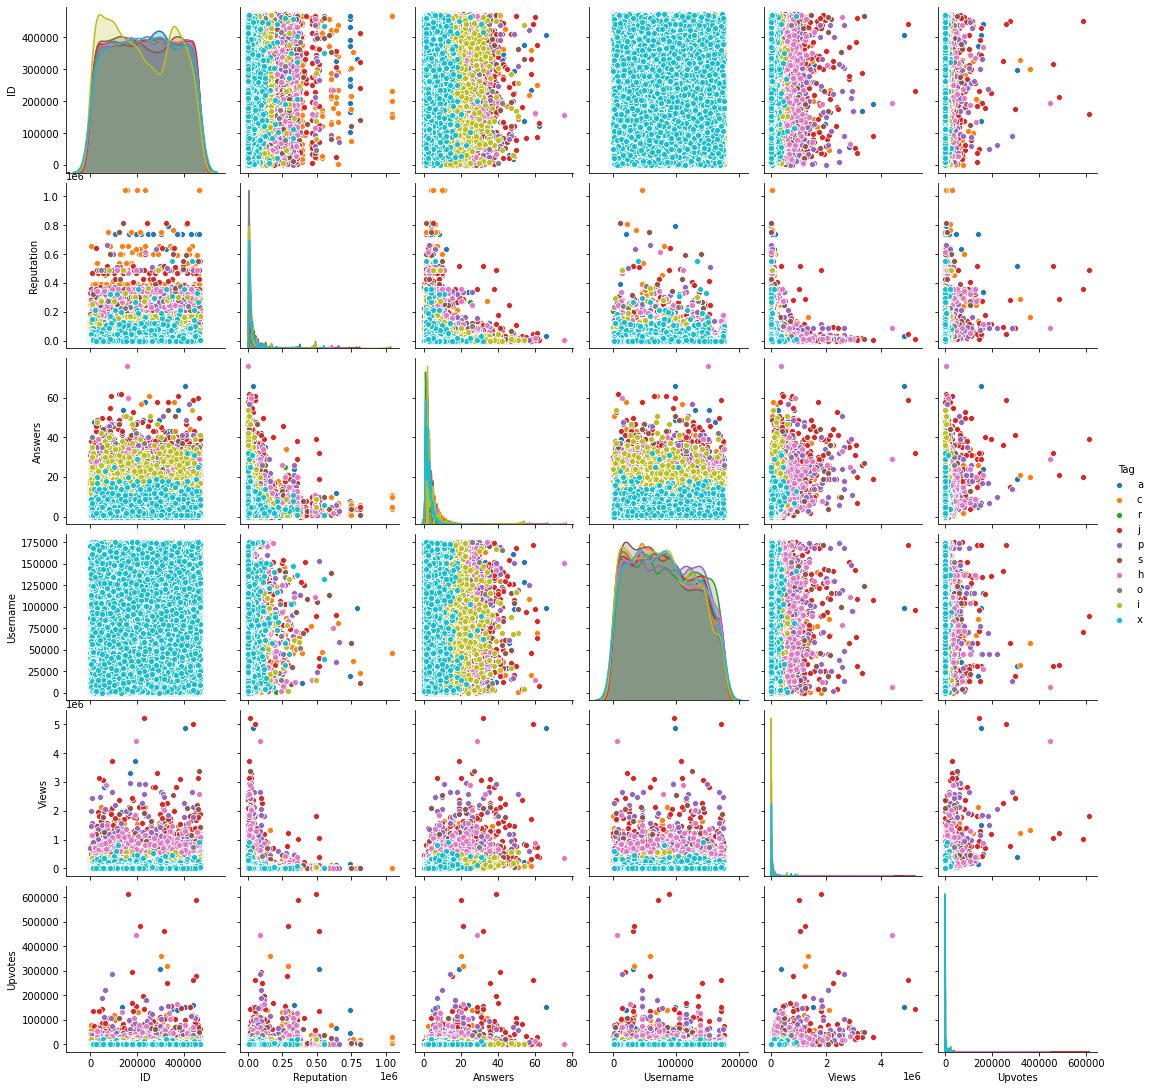

In [ ]:
sns.pairplot(train,hue = 'Tag')

Data visualization

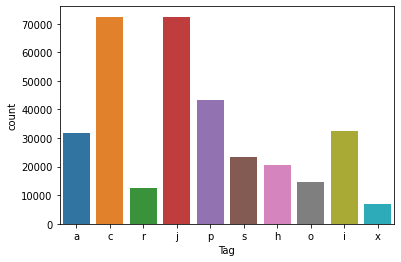

In [ ]:
sns.countplot(x = 'Tag', data = train)

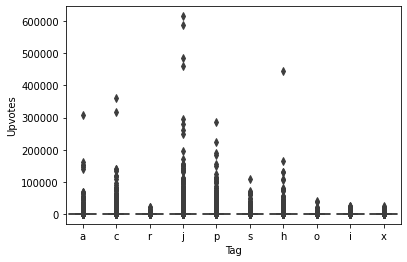

In [ ]:
sns.boxplot(x = "Tag", y = "Upvotes", data = train)

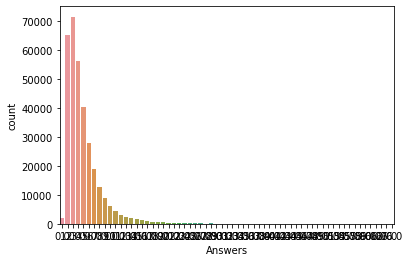

In [ ]:
sns.countplot(x = 'Answers', data = train)

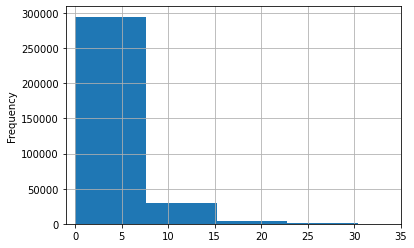

In [ ]:
train["Answers"].plot.hist()
plt.xlim(-1, 35)
plt.grid(True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5cfa74048>,
      dtype=object)

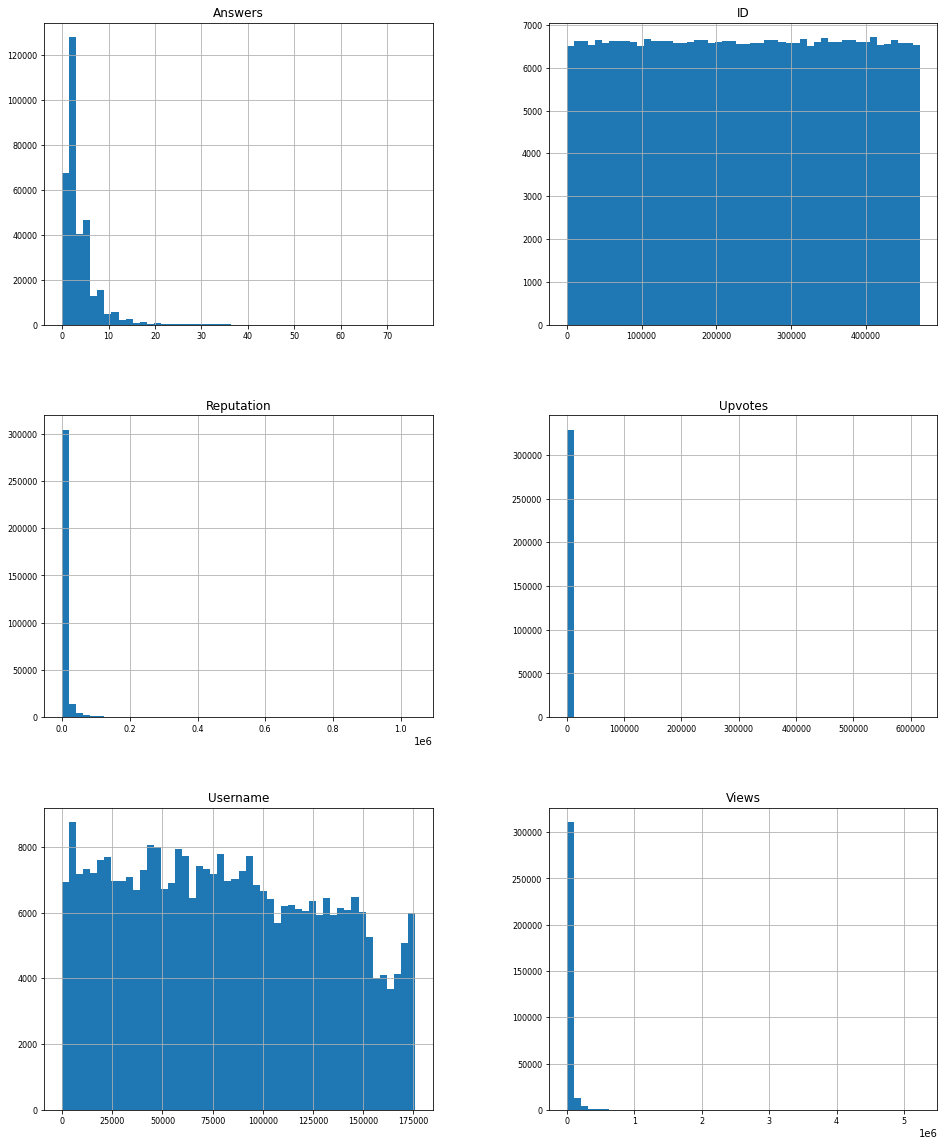

In [ ]:
train.hist(figsize = (16, 20), bins = 50, xlabelsize = 8, ylabelsize = 8)

Correlation matrix

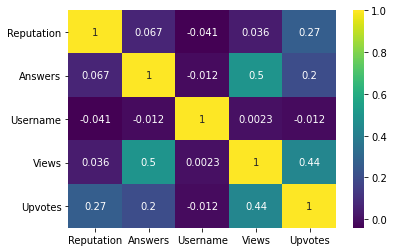

In [ ]:
corr_matrix = train[['Reputation', 'Answers', 'Username', 'Views', 'Upvotes']].corr()


sns.heatmap(corr_matrix,cmap='viridis',annot=True)

In [ ]:
train.drop(['Username','ID'], inplace = True, axis = 1)

train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0


Tagwise grouping of Answers and Upvotes

In [ ]:
sum_df=train.groupby(by='Tag').sum()
avg_df=train.groupby(by='Tag').mean()

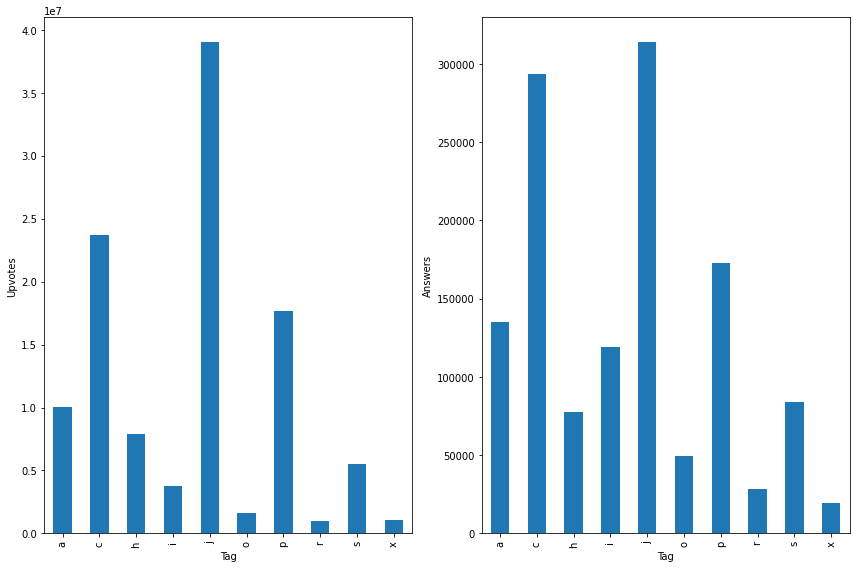

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sum_df['Upvotes'].plot(kind='bar',cmap='tab20')
plt.ylabel('Upvotes')
plt.subplot(1,2,2)
sum_df['Answers'].plot(kind='bar',cmap='tab20')
plt.ylabel('Answers')
plt.tight_layout()

Preprocessing data

In [ ]:
train['Tag'] = LabelEncoder().fit_transform(train['Tag'])
train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0


In [ ]:
scaler = StandardScaler()
scaler.fit(train.drop('Upvotes', axis = 1))
scaled_features = scaler.transform(train.drop('Upvotes', axis = 1))

In [ ]:
df = pd.DataFrame(scaled_features, columns = train.columns[:-1])
df.head()

,Tag,Reputation,Answers,Views
0,-1.420677,-0.141573,-0.535736,-0.269158
1,-1.420677,0.675238,2.257943,0.323087
2,-1.019702,-0.237059,0.023000,-0.266540
3,-1.420677,-0.277486,-0.256368,-0.031882
4,-1.019702,-0.129415,0.023000,-0.193426


In [ ]:
df.isnull().sum()

Tag           0
Reputation    0
Answers       0
Views         0
dtype: int64

In [ ]:
y = train['Upvotes']

In [ ]:
df.isnull().sum()

Tag           0
Reputation    0
Answers       0
Views         0
dtype: int64

Splitting dataset into train and test data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features, y,test_size = 0.3, random_state = 42)

**Linear Regression**

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

array([  14.2448703 ,  861.92645241, -156.09888435, 1599.9918567 ])

In [ ]:
reg.intercept_

334.94382134549113

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [ ]:
print("RMSE = ",rmse,"R2 SCORE = ",r2)

RMSE =  3390.1713583325964 R2 SCORE =  0.23455176067709083


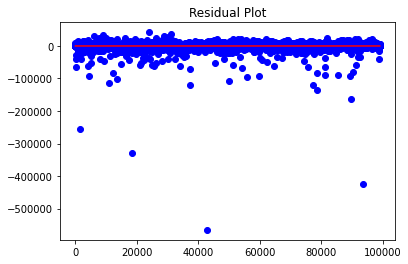

In [ ]:
# Residual plot
x = [i for i in range(1,len(y_pred)+1)]

x_plot = plt.scatter(x,(y_pred-y_test),c = 'b')
plt.plot(x,[0]*len(y_pred),c = 'r')

plt.title("Residual Plot")
plt.show()

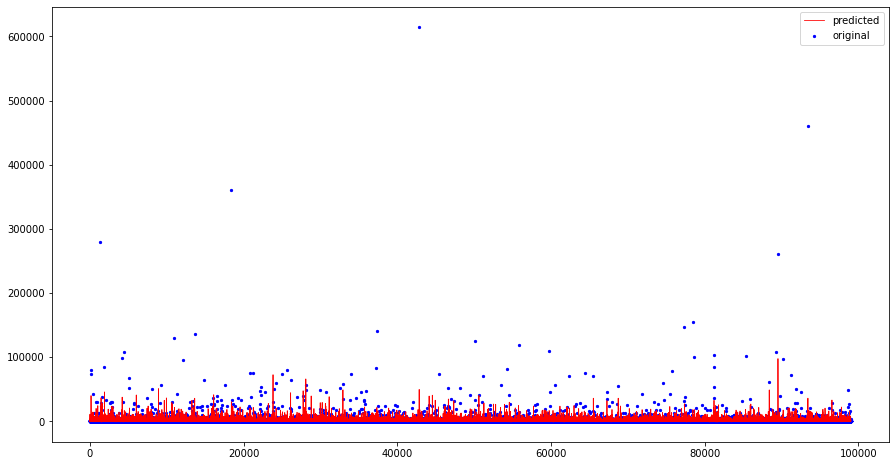

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(15,8))
plt.scatter(x_ax,y_test,s=5,color='blue', label='original')
plt.plot(x_ax,y_pred,lw=0.8,color='red', label='predicted')
plt.legend()
plt.show()

Regularization

In [ ]:
predictors = scaled_features
predictors

array([[-1.42067741, -0.14157253, -0.53573597, -0.26915833],
       [-1.42067741,  0.67523751,  2.25794312,  0.32308687],
       [-1.0197016 , -0.23705919,  0.02299985, -0.26653963],
       ...,
       [-1.0197016 , -0.05894553, -0.53573597, -0.33588566],
       [ 0.18322582, -0.2839526 , -0.53573597, -0.34015957],
       [ 0.18322582, -0.21329838,  0.02299985, -0.33463807]])

In [ ]:
coef = pd.Series(np.random.randn(4), reg.coef_,predictors).sort_values()
coef


 14.244870     -0.554773
 1599.991857   -0.175596
-156.098884     0.181589
 861.926452     1.062258
dtype: float64

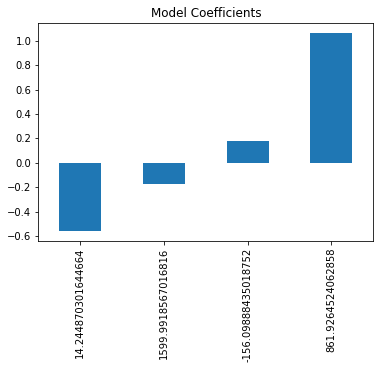

In [ ]:
coef.plot(kind = 'bar',title = 'Model Coefficients')

**Ridge** **Regression**

In [ ]:
ridgeReg = Ridge(alpha = 0.05, normalize = True)
ridgeReg.fit(x_train,y_train)
pred1 = ridgeReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred1))
r2 = r2_score(y_test,pred1)
print("RMSE = ",rmse)
print("R2 = ",r2)

RMSE =  3393.6949713711024
R2 =  0.23295977917265664


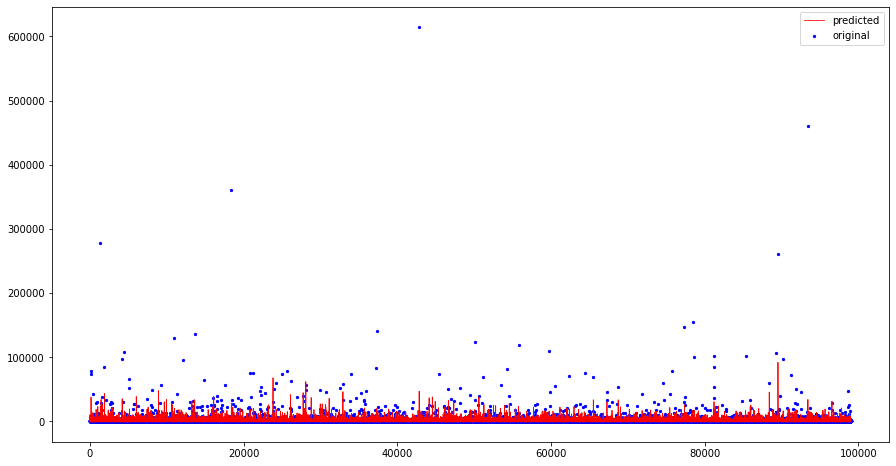

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(15,8))
plt.scatter(x_ax,y_test,s=5,color='blue', label='original')
plt.plot(x_ax,pred1,lw=0.8,color='red', label='predicted')
plt.legend()
plt.show()

**Lasso** **Regression**

In [ ]:
lassoReg = Lasso(alpha = 0.021, normalize = True)
lassoReg.fit(x_train,y_train)
pred2 = lassoReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred2))
r2 = r2_score(y_test,pred2)
print("RMSE = ",rmse)
print("R2 = ",r2)

RMSE =  3390.573806281125
R2 =  0.23437001685025705


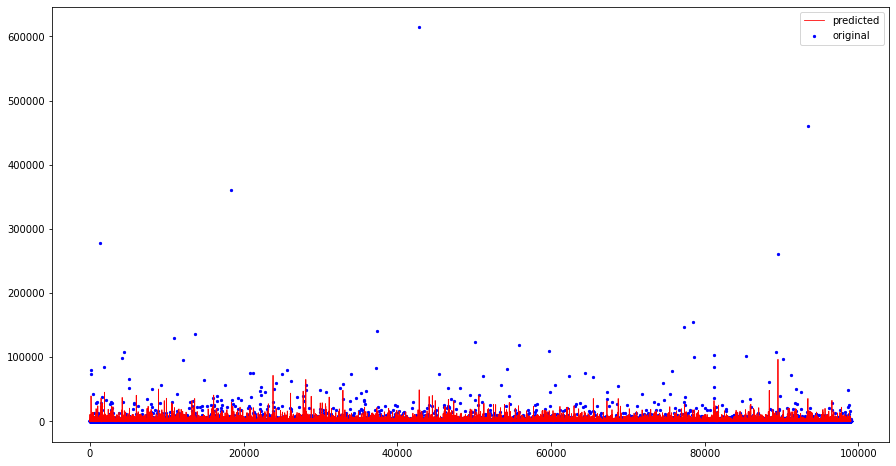

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(15,8))
plt.scatter(x_ax,y_test,s=5,color='blue', label='original')
plt.plot(x_ax,pred2,lw=0.8,color='red', label='predicted')
plt.legend()
plt.show()

**LassoLars** 

In [ ]:
feature = [ x for x in train.columns if x not in ['Upvotes']]
x_train,x_test,y_train,y_test = train_test_split(train[feature], y,test_size = 0.3, random_state = 0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
poly_reg = PolynomialFeatures(degree = 4, interaction_only = False, include_bias = True)
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_train, y_train)
lin = linear_model.LassoLars(alpha = 0.021)
lin.fit(x_poly, y_train)

LassoLars(alpha=0.021, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
          positive=False, precompute='auto', verbose=False)

In [ ]:
pred = poly_reg.fit_transform(x_test)
pred_val1 = lin.predict(pred)

print(r2_score(y_test, pred_val1))

0.9088276209559183


In [ ]:
print(np.sqrt(mean_squared_error(y_test,pred_val1)))

793.4209104917603


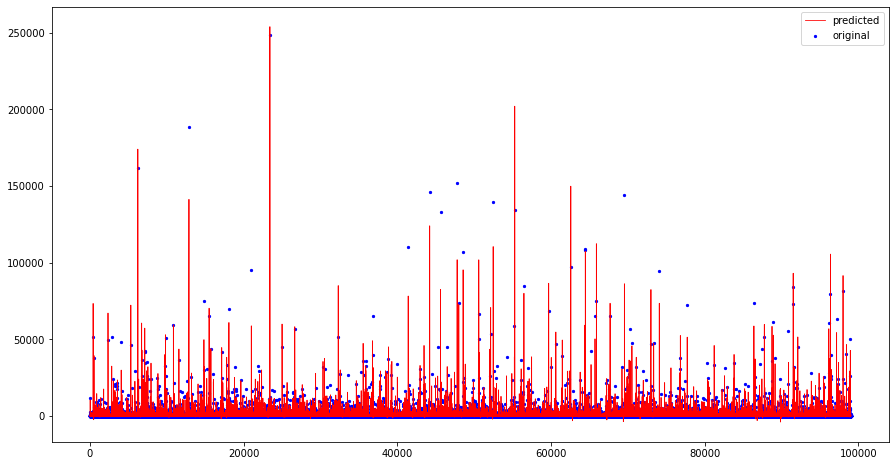

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(15,8))
plt.scatter(x_ax,y_test,s=5,color='blue', label='original')
plt.plot(x_ax,pred_val1,lw=0.8,color='red', label='predicted')
plt.legend()
plt.show()

LassoLars linear model works better than the other regression models with an accuracy of 90% and RMSE value of 793.4209

**PREDICT TEST DATA**

In [ ]:
test = pd.read_csv("test_8i3B3FC.csv") 

In [ ]:
test.isnull().sum()


ID            0
Tag           0
Reputation    0
Answers       0
Username      1
Views         1
dtype: int64

In [ ]:
test = test.dropna()
test.reset_index(drop=True)

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652.0,33200.0
1,71864,c,24511.0,6.0,37685.0,2730.0
2,141692,i,927.0,1.0,135293.0,21167.0
3,316833,i,21.0,6.0,166998.0,18528.0
4,440445,i,4475.0,10.0,53504.0,57240.0
...,...,...,...,...,...,...
63466,339386,i,11143.0,1.0,67984.0,790.0
63467,420825,c,29060.0,1.0,116827.0,207.0
63468,463773,i,941.0,2.0,173313.0,13838.0
63469,140621,j,12404.0,3.0,139209.0,18665.0


In [ ]:
test.drop(['Username','ID'], inplace = True, axis = 1)
test.head()

,Tag,Reputation,Answers,Views
0,a,5645.0,3.0,33200.0
1,c,24511.0,6.0,2730.0
2,i,927.0,1.0,21167.0
3,i,21.0,6.0,18528.0
4,i,4475.0,10.0,57240.0


In [ ]:
test['Tag'] = LabelEncoder().fit(test['Tag']).transform(test['Tag'])
test.head()

,Tag,Reputation,Answers,Views
0,0,5645.0,3.0,33200.0
1,1,24511.0,6.0,2730.0
2,3,927.0,1.0,21167.0
3,3,21.0,6.0,18528.0
4,3,4475.0,10.0,57240.0


In [ ]:
test_copy = test.copy()
test_copy.head()

,Tag,Reputation,Answers,Views
0,0,5645.0,3.0,33200.0
1,1,24511.0,6.0,2730.0
2,3,927.0,1.0,21167.0
3,3,21.0,6.0,18528.0
4,3,4475.0,10.0,57240.0


In [ ]:
test = scaler.fit_transform(test)

In [ ]:
pred = poly_reg.fit_transform(test)
pred_val2 = lin.predict(pred)

print(pred_val2)

[212.83886379  71.21102384  47.1208677  ...  42.00050832 241.96470148
   7.9877373 ]


In [ ]:
print(lin.score(pred, pred_val2))

1.0


Concatenating predicted values with the original test dataset and analyzing the accuracy of prediction

In [ ]:
upvote = pd.DataFrame({'Upvotes':pred_val2})
test_copy = test_copy.join(upvote['Upvotes'])
test_copy

,Tag,Reputation,Answers,Views,Upvotes
0,0,5645.0,3.0,33200.0,212.838864
1,1,24511.0,6.0,2730.0,71.211024
2,3,927.0,1.0,21167.0,47.120868
3,3,21.0,6.0,18528.0,52.294608
4,3,4475.0,10.0,57240.0,299.309410
...,...,...,...,...,...
63466,3,11143.0,1.0,790.0,29.280595
63467,1,29060.0,1.0,207.0,52.669798
63468,3,941.0,2.0,13838.0,42.000508
63469,4,12404.0,3.0,18665.0,241.964701


In [ ]:
scaler = StandardScaler()
scaler.fit(test_copy.drop('Upvotes', axis = 1))
scaled_features = scaler.transform(test_copy.drop('Upvotes', axis = 1))

In [ ]:
df = pd.DataFrame(scaled_features, columns = test_copy.columns[:-1])
df

,Tag,Reputation,Answers,Views
0,-1.424820,-0.080868,-0.254543,0.042881
1,-1.024210,0.607265,0.585856,-0.337177
2,-0.222992,-0.252956,-0.814809,-0.107209
3,-0.222992,-0.286002,0.585856,-0.140126
4,-0.222992,-0.123544,1.706388,0.342736
...,...,...,...,...
63466,-0.222992,0.119670,-0.814809,-0.361375
63467,-1.024210,0.773189,-0.814809,-0.368647
63468,-0.222992,-0.252446,-0.534676,-0.198625
63469,0.177617,0.165665,-0.254543,-0.138417


In [ ]:
test_copy.isnull().sum()

Tag           0
Reputation    0
Answers       0
Views         0
Upvotes       0
dtype: int64

In [ ]:
y = test_copy['Upvotes']

In [ ]:
feature = [ x for x in test_copy.columns if x not in ['Upvotes']]
x_train,x_test,y_train,y_test = train_test_split(test_copy[feature], y,test_size = 0.2, random_state = 0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
poly_reg = PolynomialFeatures(degree = 4, interaction_only = False, include_bias = True)
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_train, y_train)
lin = linear_model.LassoLars(alpha = 0.021)
lin.fit(x_poly, y_train)

LassoLars(alpha=0.021, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
          positive=False, precompute='auto', verbose=False)

In [ ]:
pred = poly_reg.fit_transform(x_test)
pred_val2 = lin.predict(pred)


print(r2_score(y_test, pred_val2))

0.9983231619443474


In [ ]:
print(np.sqrt(mean_squared_error(y_test,pred_val2)))

103.96323811516609
